In [62]:
# Import our dependencies
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Import our input dataset
weather_df_original = pd.read_csv('https://raw.githubusercontent.com/Alphaomegainfinity/energy_consumption_vs_weather_data/main/Resources/weather.csv', encoding='latin-1')
price_demand_df_original = pd.read_csv('https://raw.githubusercontent.com/Alphaomegainfinity/energy_consumption_vs_weather_data/main/Resources/price_and_demand.csv', encoding='latin-1')

In [3]:
# Checking any missing values per column and per rows
def data_checking(weather):
    # Identify NaN or empty values
    missing_values = weather.isna().sum()

    # Identify incorrect value types
    incorrect_types = weather.apply(lambda x: pd.to_numeric(x, errors='coerce').isna().sum())

    # Combine the results into a DataFrame
    cleaning_report = pd.DataFrame({'Missing Values': missing_values, 'Incorrect Types': incorrect_types})

    return cleaning_report

### Processing Weather file

In [4]:
data_checking (weather_df_original)

,Missing Values,Incorrect Types
Location,0,175
Date,0,175
Minimum temperature (°C),0,0
Maximum temperature (°C),1,1
Rainfall (mm),0,0
Evaporation (mm),175,175
Sunshine (hours),175,175
Direction of maximum wind gust,1,175
Speed of maximum wind gust (km/h),1,1
Time of maximum wind gust,1,175


In [5]:
# Create a copy of the original dataframe to avoid modifying it
weather_df = weather_df_original.copy()
price_demand_df = price_demand_df_original.copy()

In [6]:
# Drop off all empty columns
weather_df = weather_df.dropna(axis=1, how='all')
weather_df

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,SW,44.0,11:36:00,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33:00,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07:00,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,S,24.0,14:50:00,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,N,31.0,11:58:00,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47:00,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48:00,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,SSW,22.0,16:09:00,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,SSW,26.0,15:45:00,16.7,79,SSE,7,1034.4,17.8,71.0,SSW,13.0,1032.4


In [7]:
# Convert the Date column to datetime64
weather_df['Date'] = pd.to_datetime(weather_df['Date'], dayfirst=True)

In [8]:
# check the data types
weather_df.dtypes

Location                                     object
Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Direction of maximum wind gust               object
Speed of maximum wind gust (km/h)           float64
Time of maximum wind gust                    object
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind direction                           object
9am wind speed (km/h)                        object
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind direction                           object
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object

In [9]:
# Drop off all rows that have more than 4 missing values
weather_df = weather_df.dropna(thresh=len(weather_df.columns)-4)

In [10]:
# Set the Time of maximum wind gust column to numeric:
weather_df['Time of maximum wind gust'] = pd.to_timedelta(weather_df['Time of maximum wind gust'].apply(lambda x: x.zfill(5)))

c:\Users\John Paul\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
# Replace 'calm' with 0
weather_df['9am wind speed (km/h)'] = weather_df['9am wind speed (km/h)'].replace('Calm', 0.0, inplace=False)

# Convert the 9am wind speed column to numeric:
weather_df['9am wind speed (km/h)'] = pd.to_numeric(weather_df['9am wind speed (km/h)'])

c:\Users\John Paul\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\John Paul\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
weather_df

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",2022-11-01,8.5,13.3,3.0,SW,44.0,0 days 11:36:00,12.0,64,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2022-11-02,6.9,15.7,2.8,SSW,43.0,0 days 11:33:00,11.0,65,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",2022-11-03,9.1,15.4,0.4,SSW,31.0,0 days 08:07:00,11.5,70,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",2022-11-04,10.2,17.8,0.2,S,24.0,0 days 14:50:00,12.3,84,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",2022-11-05,11.8,22.7,0.0,N,31.0,0 days 11:58:00,14.0,78,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,"Melbourne (Olympic Park), Victoria",2023-04-19,14.4,17.5,1.2,SW,28.0,0 days 11:32:00,14.8,66,WSW,9.0,1022.0,15.8,53.0,SSW,9.0,1022.1
170,"Melbourne (Olympic Park), Victoria",2023-04-20,7.8,18.5,0.0,SSW,17.0,0 days 12:47:00,12.4,72,NNE,7.0,1026.8,17.5,58.0,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",2023-04-21,11.3,19.0,0.0,SSW,13.0,0 days 10:48:00,14.8,78,NE,6.0,1030.5,18.6,64.0,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",2023-04-22,14.6,19.2,0.0,SSW,22.0,0 days 16:09:00,15.2,84,SW,6.0,1031.9,18.8,64.0,SSW,11.0,1029.7


In [13]:
data_checking (weather_df)

,Missing Values,Incorrect Types
Location,0,174
Date,0,0
Minimum temperature (°C),0,0
Maximum temperature (°C),0,0
Rainfall (mm),0,0
Direction of maximum wind gust,0,174
Speed of maximum wind gust (km/h),0,0
Time of maximum wind gust,0,0
9am Temperature (°C),0,0
9am relative humidity (%),0,0


### Processing Price and Demand file

In [14]:
data_checking (price_demand_df)

,Missing Values,Incorrect Types
VIC1,0,8351
1/11/2022 0:30,0,8351
4178.18,0,0
8.94,0,0
TRADE,0,8351


In [15]:
# Checking data type and shape of dataframe
price_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8351 entries, 0 to 8350
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VIC1            8351 non-null   object 
 1   1/11/2022 0:30  8351 non-null   object 
 2   4178.18         8351 non-null   float64
 3   8.94            8351 non-null   float64
 4   TRADE           8351 non-null   object 
dtypes: float64(2), object(3)
memory usage: 326.3+ KB


In [16]:
# Adding headers for price_demand_df:
header = ["State", "Date_Time", "Demand", "Price", "Trading_Status"]
price_demand_df.columns = header
price_demand_df

,State,Date_Time,Demand,Price,Trading_Status
0,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
1,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
2,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
3,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE
4,VIC1,1/11/2022 3:00,3919.59,1.04,TRADE
...,...,...,...,...,...
8346,VIC1,23/04/2023 22:00,4717.55,84.09,TRADE
8347,VIC1,23/04/2023 22:30,4520.39,81.25,TRADE
8348,VIC1,23/04/2023 23:00,4472.49,93.97,TRADE
8349,VIC1,23/04/2023 23:30,4621.36,83.96,TRADE


In [17]:
# Convert the Date_Time column from object type to datetime type,
price_demand_df['Date_Time'] = pd.to_datetime(price_demand_df['Date_Time'], dayfirst=True)

In [18]:
# Drop off any irrelevant columns
price_demand_df = price_demand_df[['Date_Time', 'Demand', 'Price']]
price_demand_df

,Date_Time,Demand,Price
0,2022-11-01 01:00:00,4086.02,0.14
1,2022-11-01 01:30:00,4033.37,0.02
2,2022-11-01 02:00:00,3985.64,0.00
3,2022-11-01 02:30:00,3885.64,0.02
4,2022-11-01 03:00:00,3919.59,1.04
...,...,...,...
8346,2023-04-23 22:00:00,4717.55,84.09
8347,2023-04-23 22:30:00,4520.39,81.25
8348,2023-04-23 23:00:00,4472.49,93.97
8349,2023-04-23 23:30:00,4621.36,83.96


In [19]:
# rechecking the dataframe information and type
price_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8351 entries, 0 to 8350
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date_Time  8351 non-null   datetime64[ns]
 1   Demand     8351 non-null   float64       
 2   Price      8351 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 195.9 KB


In [20]:
# Split the Date_Time column into separate Date and Time columns
price_demand_df['Date'] = pd.to_datetime(((price_demand_df['Date_Time']).dt.date), dayfirst=True)
price_demand_df['Time'] = pd.to_datetime(price_demand_df['Date_Time'].dt.strftime('%H:%M:%S')).dt.time

# Rearrange all the columns, remove the Time column because it is redundant
price_demand = price_demand_df[['Date', 'Demand', 'Price']]
price_demand

c:\Users\John Paul\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Demand,Price
0,2022-11-01,4086.02,0.14
1,2022-11-01,4033.37,0.02
2,2022-11-01,3985.64,0.00
3,2022-11-01,3885.64,0.02
4,2022-11-01,3919.59,1.04
...,...,...,...
8346,2023-04-23,4717.55,84.09
8347,2023-04-23,4520.39,81.25
8348,2023-04-23,4472.49,93.97
8349,2023-04-23,4621.36,83.96


In [21]:
price_demand = price_demand.groupby(['Date']).sum().reset_index()
price_demand

#the totatal demand

,Date,Demand,Price
0,2022-11-01,203251.28,-185.78
1,2022-11-02,233630.93,-120.73
2,2022-11-03,235672.34,3034.04
3,2022-11-04,224895.28,5325.08
4,2022-11-05,189190.35,3502.20
...,...,...,...
170,2023-04-20,227925.10,6273.96
171,2023-04-21,232043.13,6310.13
172,2023-04-22,207431.82,3858.79
173,2023-04-23,195560.35,3034.26


In [44]:
# Joining two datasets: energy consumption and weather
daily_weather_energy_consumption_df = pd.merge(weather_df, price_demand, on='Date', how='inner')
daily_weather_energy_consumption_df

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Demand,Price
0,"Melbourne (Olympic Park), Victoria",2022-11-01,8.5,13.3,3.0,SW,44.0,0 days 11:36:00,12.0,64,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5,203251.28,-185.78
1,"Melbourne (Olympic Park), Victoria",2022-11-02,6.9,15.7,2.8,SSW,43.0,0 days 11:33:00,11.0,65,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4,233630.93,-120.73
2,"Melbourne (Olympic Park), Victoria",2022-11-03,9.1,15.4,0.4,SSW,31.0,0 days 08:07:00,11.5,70,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3,235672.34,3034.04
3,"Melbourne (Olympic Park), Victoria",2022-11-04,10.2,17.8,0.2,S,24.0,0 days 14:50:00,12.3,84,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6,224895.28,5325.08
4,"Melbourne (Olympic Park), Victoria",2022-11-05,11.8,22.7,0.0,N,31.0,0 days 11:58:00,14.0,78,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2,189190.35,3502.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,"Melbourne (Olympic Park), Victoria",2023-04-19,14.4,17.5,1.2,SW,28.0,0 days 11:32:00,14.8,66,WSW,9.0,1022.0,15.8,53.0,SSW,9.0,1022.1,220897.61,4912.03
170,"Melbourne (Olympic Park), Victoria",2023-04-20,7.8,18.5,0.0,SSW,17.0,0 days 12:47:00,12.4,72,NNE,7.0,1026.8,17.5,58.0,SW,4.0,1025.5,227925.10,6273.96
171,"Melbourne (Olympic Park), Victoria",2023-04-21,11.3,19.0,0.0,SSW,13.0,0 days 10:48:00,14.8,78,NE,6.0,1030.5,18.6,64.0,SSE,2.0,1029.2,232043.13,6310.13
172,"Melbourne (Olympic Park), Victoria",2023-04-22,14.6,19.2,0.0,SSW,22.0,0 days 16:09:00,15.2,84,SW,6.0,1031.9,18.8,64.0,SSW,11.0,1029.7,207431.82,3858.79


In [45]:
# Drop off the location of the dataset as all the recorded data is at the same location
daily_weather_energy_consumption_df = daily_weather_energy_consumption_df.drop(['Location'], axis=1)

In [46]:
daily_weather_energy_consumption_df.dtypes

Date                                  datetime64[ns]
Minimum temperature (°C)                     float64
Maximum temperature (°C)                     float64
Rainfall (mm)                                float64
Direction of maximum wind gust                object
Speed of maximum wind gust (km/h)            float64
Time of maximum wind gust            timedelta64[ns]
9am Temperature (°C)                         float64
9am relative humidity (%)                      int64
9am wind direction                            object
9am wind speed (km/h)                        float64
9am MSL pressure (hPa)                       float64
3pm Temperature (°C)                         float64
3pm relative humidity (%)                    float64
3pm wind direction                            object
3pm wind speed (km/h)                        float64
3pm MSL pressure (hPa)                       float64
Demand                                       float64
Price                                        f

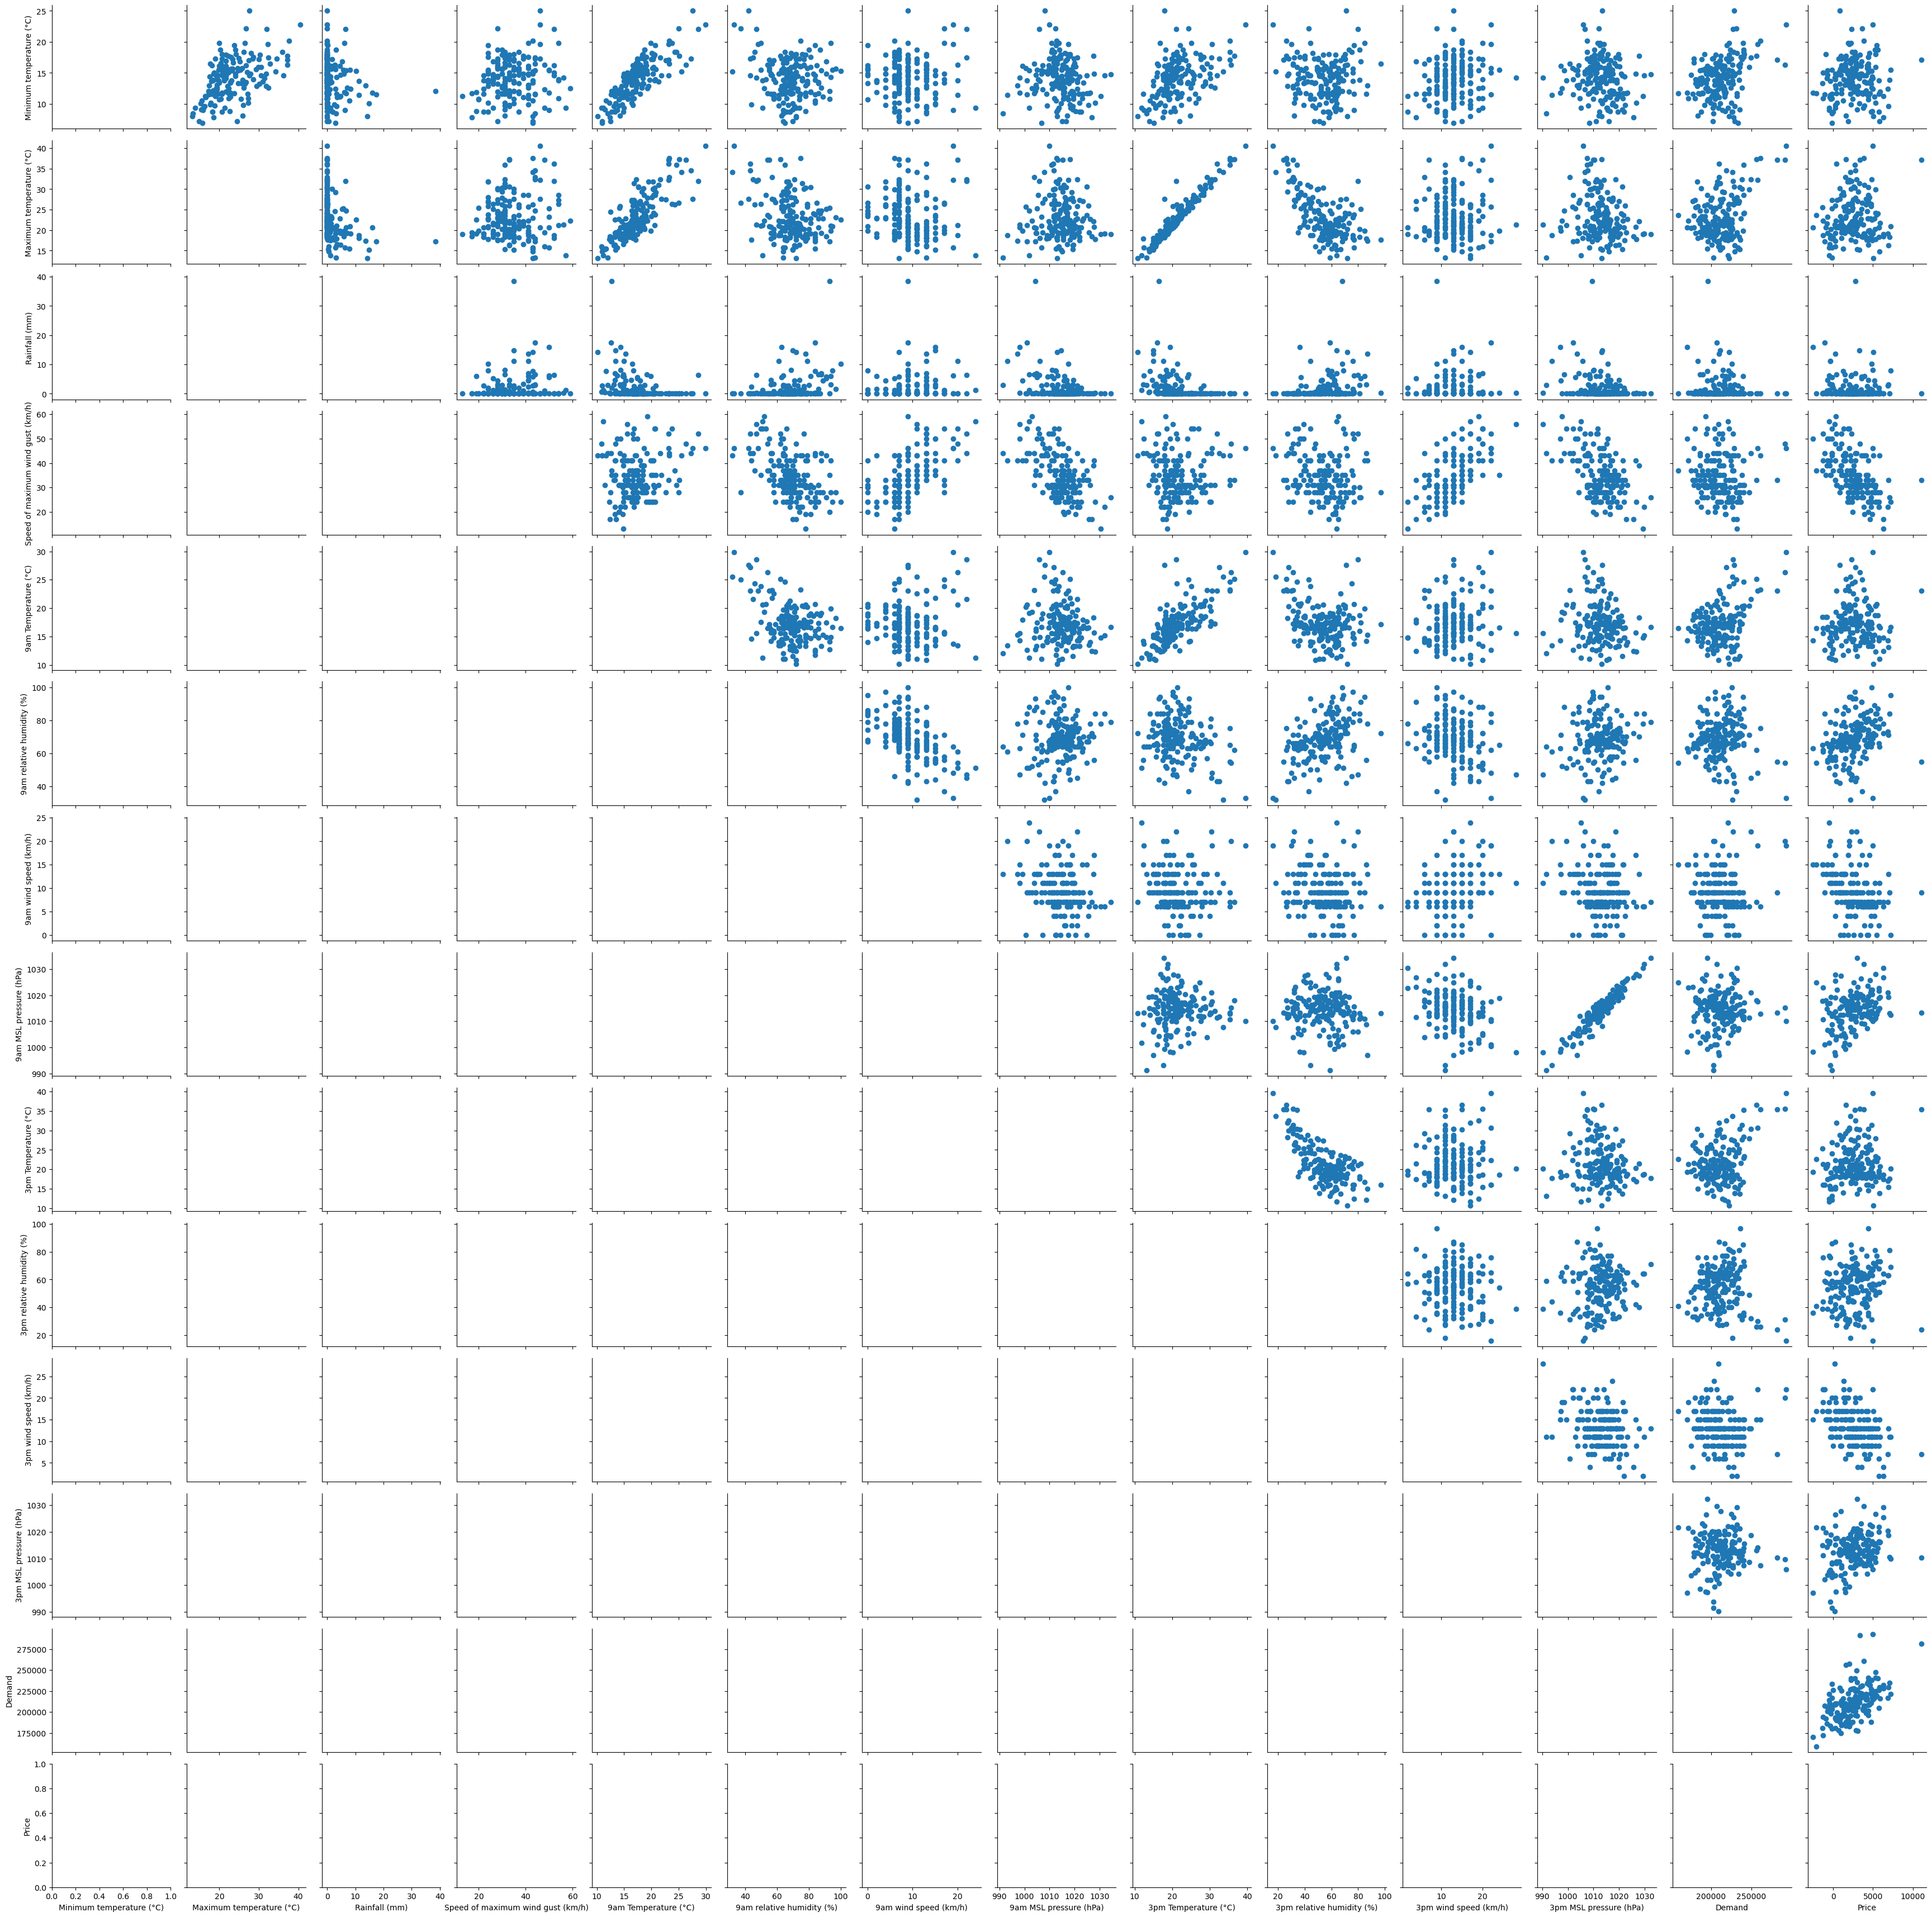

In [38]:
# Correlation Matrix to make all scatter plots at once
# Create a grid of column pairs with scatter plots for non-diagonal(upper portion)
sns.PairGrid(daily_weather_energy_consumption_df).map_upper(plt.scatter)

In [47]:
daily_weather_energy_consumption_df = pd.get_dummies(daily_weather_energy_consumption_df)
daily_weather_energy_consumption_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),...,3pm wind direction_NNW,3pm wind direction_NW,3pm wind direction_S,3pm wind direction_SE,3pm wind direction_SSE,3pm wind direction_SSW,3pm wind direction_SW,3pm wind direction_W,3pm wind direction_WNW,3pm wind direction_WSW
0,2022-11-01,8.5,13.3,3.0,44.0,0 days 11:36:00,12.0,64,13.0,991.3,...,0,0,0,0,0,0,0,0,1,0
1,2022-11-02,6.9,15.7,2.8,43.0,0 days 11:33:00,11.0,65,9.0,1006.7,...,0,0,0,0,0,1,0,0,0,0
2,2022-11-03,9.1,15.4,0.4,31.0,0 days 08:07:00,11.5,70,9.0,1019.2,...,0,0,0,0,0,1,0,0,0,0
3,2022-11-04,10.2,17.8,0.2,24.0,0 days 14:50:00,12.3,84,6.0,1028.1,...,0,0,0,0,0,0,1,0,0,0
4,2022-11-05,11.8,22.7,0.0,31.0,0 days 11:58:00,14.0,78,9.0,1026.3,...,0,0,0,0,0,0,1,0,0,0


In [48]:
# Checkin the data types of the columns
daily_weather_energy_consumption_df.dtypes

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
                                          ...      
3pm wind direction_SSW                        uint8
3pm wind direction_SW                         uint8
3pm wind direction_W                          uint8
3pm wind direction_WNW                        uint8
3pm wind direction_WSW                        uint8
Length: 61, dtype: object

In [51]:
# Drop any rows with missing values (if needed)
daily_weather_energy_consumption_df = daily_weather_energy_consumption_df.dropna()

In [52]:
# Split our preprocessed data into our features and target arrays
y = daily_weather_energy_consumption_df["Demand"]
X = daily_weather_energy_consumption_df.drop(["Demand", "Date", "Time of maximum wind gust"], axis=1)

### *Which Model will be used*
We use Regresssion Model because our target value is maximum daily energy usage and it is a continuous (numerical) value

[1.12973943e-01 1.02639314e-01 1.40877179e-02 1.51622801e-02
 6.23953229e-02 2.36717479e-02 1.46853670e-02 2.09482352e-02
 2.00100536e-01 2.49174908e-02 1.29198072e-02 2.14168744e-02
 2.97730056e-01 3.85040333e-06 4.72957012e-04 4.82083229e-03
 4.20330653e-05 6.08295521e-03 1.33167434e-04 8.57625508e-03
 1.36814183e-04 1.22765166e-03 2.38313450e-03 1.01200075e-03
 3.47880529e-04 5.81541092e-04 5.31637812e-04 1.48816987e-03
 2.50128833e-04 1.76087731e-03 2.49718138e-04 4.59659581e-03
 8.54332534e-04 1.38511808e-03 1.26684989e-04 2.92787910e-04
 1.06846163e-03 1.64840407e-03 1.40484094e-03 8.06760979e-04
 7.71051058e-03 4.37175682e-03 2.75829195e-04 1.04660358e-03
 2.06844961e-05 9.05752559e-04 1.69835034e-04 2.18953083e-04
 6.98729014e-04 1.58046681e-03 2.33573463e-03 3.04283135e-03
 8.23315816e-04 3.63462225e-03 2.05318429e-03 5.28557900e-05
 1.48009552e-04 4.97604147e-03]


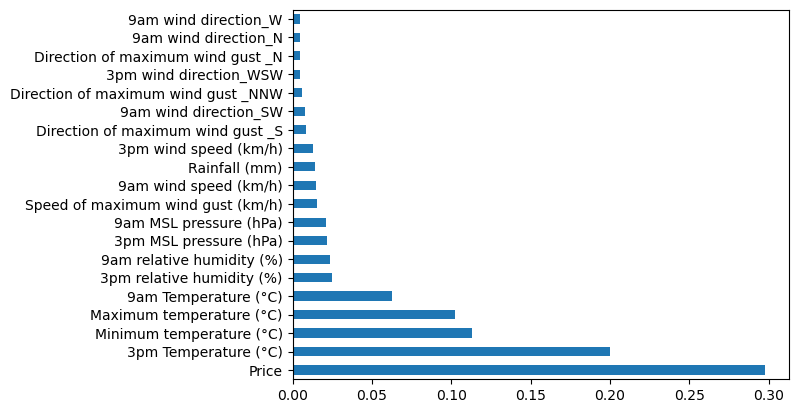

In [54]:
# Checking which feature is important to the target:
important_feature = RandomForestRegressor()
important_feature.fit(X,y)
print(important_feature.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(important_feature.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [55]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) 

In [56]:
# Create a StandardScaler instances
scaler = skl.preprocessing.StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [57]:
# Checking the number of feature:
number_input_feature = X_train.shape[1]
number_input_feature

58

In [58]:
# Create a function to test the model:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()   

In [63]:
# Testing different models
data = [X_train_scaled, X_test_scaled, y_train, y_test]

test_model(LinearRegression(), data)
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(GradientBoostingRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)
test_model(ExtraTreesRegressor(), data)

Model: LinearRegression
Train score: 0.7385102964137771
Test Score: -1.2813152132466245e+24

Model: KNeighborsRegressor
Train score: 0.4501069320396883
Test Score: -0.1180778432664078

Model: RandomForestRegressor
Train score: 0.9342773189529685
Test Score: 0.44606872070048786

Model: GradientBoostingRegressor
Train score: 0.9755959609984987
Test Score: 0.3165713897424617

Model: AdaBoostRegressor
Train score: 0.8003601424551119
Test Score: 0.37806658074308575

Model: SVR
Train score: -0.005318846111414199
Test Score: -0.0013030893054908343

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.3410710949056459



So far none of the model provided the best outcome.